In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [6]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
y = df['quality']

In [8]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

# Selección de datos de entrenamiento y prueba

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=100)

## Estimación con grado 2

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
poly_model = PolynomialFeatures(degree=2)
poly_data = poly_model.fit_transform(X_train)

In [13]:
model = LinearRegression().fit(poly_data, y_train)

In [14]:
from sklearn.metrics import r2_score

In [15]:
poly_test = poly_model.fit_transform(X_test)
y_predicted = model.predict(poly_test)
r2_score(y_test,y_predicted)

0.3353209209998367

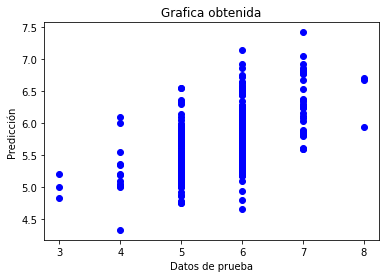

In [16]:
plt.scatter(y_test, y_predicted, color='blue', linewidth = 1)
plt.title("Grafica obtenida")
plt.xlabel('Datos de prueba')
plt.ylabel('Predicción')
plt.show()

## Estimación con grado 3

In [17]:
poly_model = PolynomialFeatures(degree=3)
poly_data = poly_model.fit_transform(X_train)

In [18]:
model = LinearRegression().fit(poly_data, y_train)

In [19]:
poly_test = poly_model.fit_transform(X_test)
y_predicted = model.predict(poly_test)
r2_score(y_test,y_predicted)

-0.6207143521696363

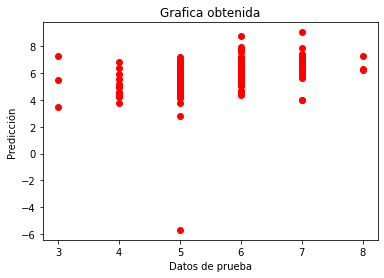

In [20]:
plt.scatter(y_test, y_predicted, color='red', linewidth = 1)
plt.title("Grafica obtenida")
plt.xlabel('Datos de prueba')
plt.ylabel('Predicción')
plt.show()

## Estimación con grado 4

In [21]:
poly_model = PolynomialFeatures(degree=4)
poly_data = poly_model.fit_transform(X_train)

In [22]:
model = LinearRegression().fit(poly_data, y_train)

In [23]:
poly_test = poly_model.fit_transform(X_test)
y_predicted = model.predict(poly_test)
r2_score(y_test,y_predicted)

-5612.97002882907

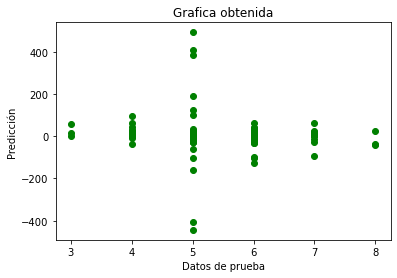

In [24]:
plt.scatter(y_test, y_predicted, color='green', linewidth = 1)
plt.title("Grafica obtenida")
plt.xlabel('Datos de prueba')
plt.ylabel('Predicción')
plt.show()